# Netflix İçerik Analizi Projesi 🎬

Bu projede Kaggle üzerinden alınan Netflix verisi analiz edilmiştir. Amaç, içerik türleri, yıllara göre dağılım, ülkelere göre üretim ve en popüler türleri analiz etmektir.

## 🔹 1. Kütüphaneleri Yükleyelim


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter için grafik ayarı
%matplotlib inline


## 🔹 2. Veriyi Yükleyelim


In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔹 3. Eksik Verileri Temizleyelim


In [5]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added'], inplace=True)


<ipython-input-5-4bf6ba9cd1c4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-5-4bf6ba9cd1c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

## 🔹 4. Yıllara Göre İçerik Sayısı


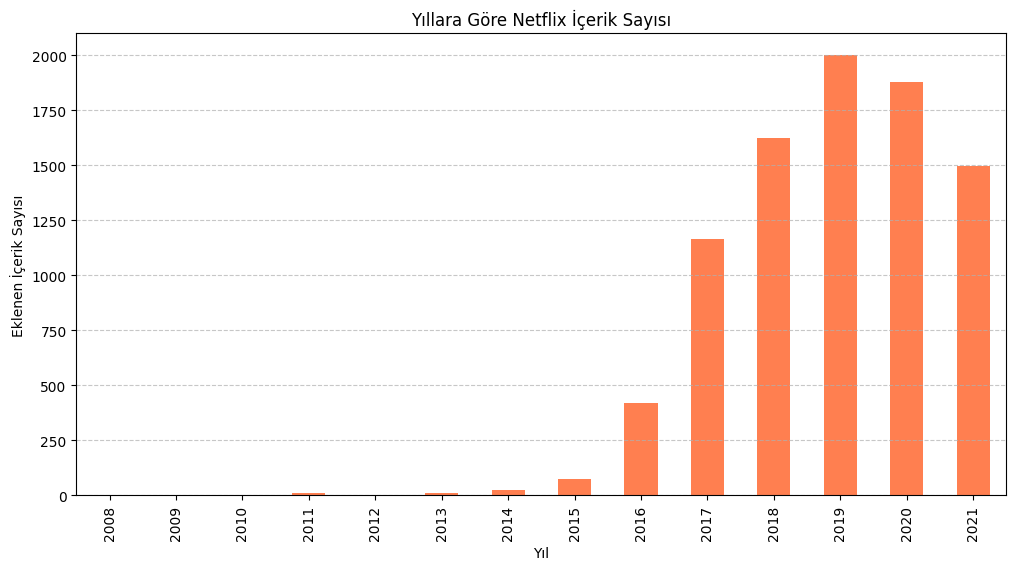

In [6]:
df['year_added'] = df['date_added'].dt.year
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
content_by_year.plot(kind='bar', color='coral')
plt.title('Yıllara Göre Netflix İçerik Sayısı')
plt.xlabel('Yıl')
plt.ylabel('Eklenen İçerik Sayısı')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 🔹 5. Film vs Dizi Oranı


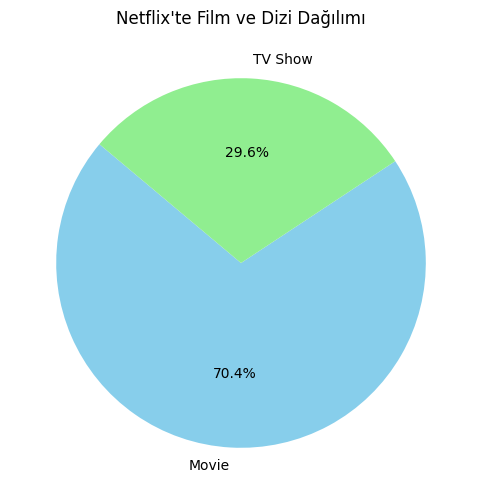

In [7]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Netflix\'te Film ve Dizi Dağılımı')
plt.ylabel('')
plt.show()


## 🔹 6. En Fazla İçeriğe Sahip Ülkeler


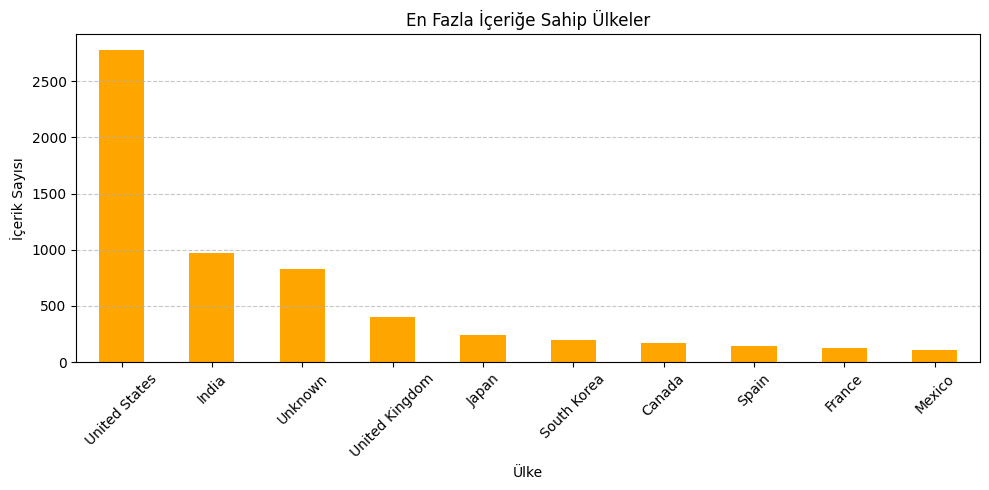

In [8]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='orange')
plt.title('En Fazla İçeriğe Sahip Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('İçerik Sayısı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🔹 7. En Popüler Türler (Genres)


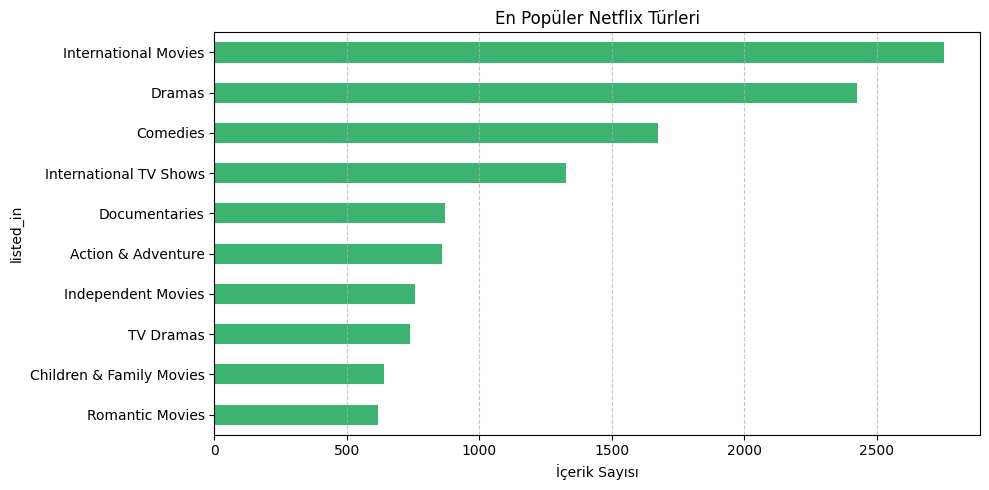

In [9]:
genre_series = df['listed_in'].dropna().apply(lambda x: [genre.strip() for genre in x.split(',')])
all_genres = genre_series.explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind='barh', color='mediumseagreen')
plt.title('En Popüler Netflix Türleri')
plt.xlabel('İçerik Sayısı')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## ✅ Sonuç ve Değerlendirme

- Netflix, son yıllarda içerik sayısını hızla artırmıştır. (pandemi döneminde göreli bir miktar düşüş olmuştur)
- Filmler, dizilere kıyasla biraz daha fazla yer kaplamaktadır.
- ABD içerik üretiminde açık ara öndedir.
- En popüler türler: International Movies, Dramas ve Comedies

